Considere que você vai trabalhar em um projeto do setor imobiliário deve prever os preços das casas para as regiões nos EUA.

O objetivo é criar um modelo para que lhe permita colocar algumas características de uma casa e retornar uma estimativa de quanto a casa venderia.

a Regressão linear pode ser um bom caminho para resolver esse problema.

Você já esplorou os dados  no Housing.csv e sabe que os dados contém as seguintes colunas:

'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
'Avg. Area House Age': Média de idade das casas da mesma cidade.
'Avg. Area Number of Rooms': Número médio de quartos para casas na mesma cidade.
'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
'Area Population': A população da cidade onde a casa está localizada.
'Price': Preço de venda da casa.
'Address': Endereço da casa;

**Vamos começar!**

Temos o conjunto de dados no csv, vamos preparar nosso ambiente com as bibliotecas que precisaremos e depois importar os dados!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
USAhousing = pd.read_csv('Housing.csv')

In [4]:
USAhousing 

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
5         80175.754159             4.988408                   6.104512   
6         64698.463428             6.025336                   8.147760   
7         78394.339278             6.989780                   6.620478   
8         59927.660813             5.362126                   6.393121   
9         81885.927184             4.423672                   8.167688   
10        80527.472083             8.093513                   5.042747   
11        50593.695497             4.496513                   7.467627   
12        39033.809237             7.671755                   7.250029   
13        73163.663441             6.919535                   5.993188   
14        69391.380184             5.344776                   8.406418   
15        73091.866746             5.443156                   8.517513   
16        79706.963058             5.067890                   8.219771   
17        61929.077018             4.788550                   5.097010   
18        63508.194299             5.947165                   7.187774   
19        62085.276403             5.739411                   7.091808   
20        86294.999089             6.627457                   8.011898   
21        60835.089979             5.551222                   6.517175   
22        64490.650267             4.210323                   5.478088   
23        60697.351539             6.170484                   7.150537   
24        59748.855487             5.339340                   7.748682   
25        56974.476539             8.287562                   7.312880   
26        82173.626076             4.018525                   6.992699   
27        64626.880978             5.443360                   6.988754   
28        90499.057451             6.384359                   4.242191   
29        59323.792100             6.977828                   8.273697   
...                ...                  ...                        ...   
4970      55980.204807             7.014510                   5.458789   
4971      73491.134427             5.784430                   4.425959   
4972      83695.272383             7.643507                   7.127219   
4973      78743.759274             6.583685                   6.595683   
4974      70720.296463             6.411801                   5.048128   
4975      54037.580879             8.471765                   6.966072   
4976      75046.313791             5.351169                   7.797825   
4977      75980.438843             6.583105                   5.914892   
4978      80393.339500             8.899713                   5.652974   
4979      82224.695006             5.434087                   8.375708   
4980      75664.024482             5.789203                   6.415312   
4981      71663.871293             6.150745                   7.311907   
4982      58800.908770             5.976507                   7.304051   
4983      69655.183954             7.721100                   6.077795   
4984      62623.359828             5.071624                   6.771015   
4985      75117.042949             6.036275                   6.538111   
4986      71060.406015             5.718839                   7.222730   
4987      65729.222330             6.237787                   6.860475   
4988      67637.840665             7.056673                   5.774409   
4989      47965.406896             5.694638                   7.363327   
4990      52723.876555             5.452237                   8.124571   
4991      74102.191890             5.657841                   7.683993   
4992      

In [5]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [7]:
 USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
USAhousing.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

Vamos criar alguns plots simples para verificar os dados.


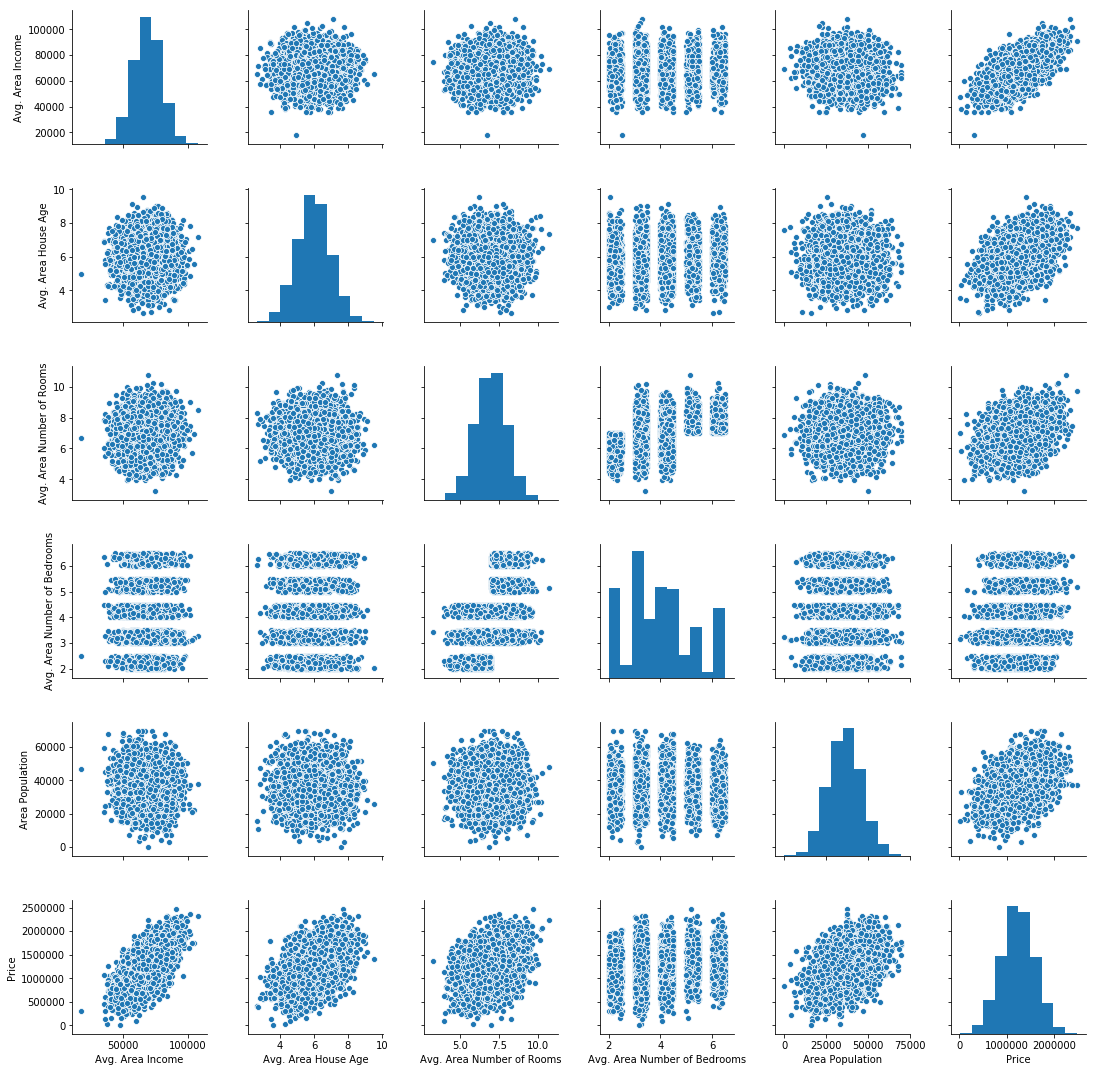

In [9]:
sns.pairplot(USAhousing)

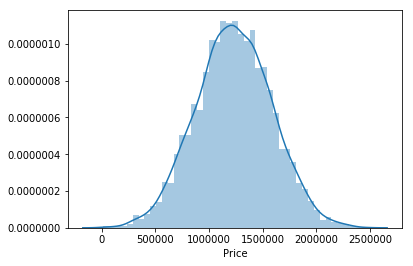

In [10]:
sns.distplot(USAhousing['Price'])

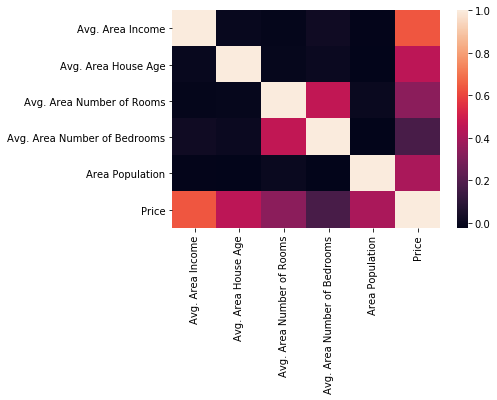

In [11]:
sns.heatmap(USAhousing.corr())

**Treinando um modelo de regressão linear**

Vamos agora começar a treinar o modelo de regressão. 

Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. 

Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.



**Arrays X e y**

In [12]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

**Split de treino**

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes.

Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Criando e treinando o modelo**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Avaliação modelo**

Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [18]:
# Printando a intercepção
print(lm.intercept_)

-2640159.796853739


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [20]:
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

**Interpretando os coeficientes:***

Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Income ** está associado a um aumento de $ 21,52.

Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area House Age ** está associada a um ** aumento de $ 164883.28 **.

Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Number of Bedrooms ** está associada a um ** aumento de $ 122368.67 **.

Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Avg. Area Number of Bedrooms ** está associada a um ** aumento de $ 2233.80 **.

Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em ** Area Population ** está associado a um ** aumento de $ 15.15 **.

Isso faz sentido? Provavelmente não porque esses dados não são reais. Se quiser dados reais para repetir este tipo de análise, confira o conjunto de dados de Boston: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html



**Predições do nosso modelo**

Vamos pegar as previsões em nosso conjunto de testes e ver o resultado!

In [21]:
predictions = lm.predict(X_test)

No eixo X temos o valor correto da casa e no eixo y o valor da predição, podemos perceber que ele chegou bem perto do modelo perfeito que seria uma linha reta.

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)

**Histograma residual**

Verificando se modelo é bom ...

In [30]:
sns.distplot((y_test-predictions),bins=50);

## Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são ** funções de perda **, porque queremos minimizá-las.

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914928
MSE: 10460958907.208244
RMSE: 102278.82922290538


**Done** 
Real project ML for predictions ;)